In [2]:
#Predictive Model 6 BUT Validation is Oct and Testing is Nov, Dec
#LSTM on Raw Data

import numpy 
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)



Using TensorFlow backend.


In [13]:
dataframe = pandas.read_csv('Demand_Data3_Total_CV_2017_with_zeros.csv', usecols=[2,3,7,8])
PUL_list = numpy.unique(dataframe['PULocationID'])
RMSE_list = [0] * len(PUL_list)
MAPE_list = [0] * len(PUL_list)
Total_dataframe = dataframe

        PULocationID  passenger_count  Month  OLS_CV_Prediction
0                  4              135      1           4.914061
1                  4              144      1           5.044026
2                  4              190      1           5.060545
3                  4              188      1           4.851725
4                  4              128      1           4.142996
5                  4               54      1           3.067487
6                  4               36      1           3.046522
7                  4               28      1           3.153168
8                  4               36      1           3.291653
9                  4               34      1           3.577294
10                 4               47      1           3.753518
11                 4               38      1           3.757276
12                 4               31      1           3.743298
13                 4               42      1           3.671520
14                 4               38   

In [14]:
i = 0
print(i/len(PUL_list))
PULoc = PUL_list[i]




0.0


In [15]:
#Training/testing Split
dataframe = Total_dataframe
dataframe = dataframe[dataframe['PULocationID'] == PULoc]
dataframe = dataframe['passenger_count']
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset = numpy.reshape(dataset, (len(dataset),1))


#Scalar transform
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


dataframe = Total_dataframe
dataframe = dataframe[dataframe['PULocationID'] == PULoc]
dataframe['passenger_count'] = dataset
dataframe = dataframe[dataframe['Month'] <= 10]
dataframe2 = dataframe[dataframe['Month'] >= 10]
dataframe['passenger_count']
dataframe2 = dataframe2['passenger_count']
dataset2 = dataframe2.values
dataset2 = dataset2.astype('float32')
dataset2 = numpy.reshape(dataset2, (len(dataset2),1))


/Users/kentarohoffman/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Epoch 1/10
 - 2s - loss: 0.0047
Epoch 2/10
 - 1s - loss: 0.0022
Epoch 3/10
 - 1s - loss: 0.0021
Epoch 4/10
 - 1s - loss: 0.0021
Epoch 5/10
 - 1s - loss: 0.0021
Epoch 6/10
 - 1s - loss: 0.0021
Epoch 7/10
 - 1s - loss: 0.0021
Epoch 8/10
 - 1s - loss: 0.0021
Epoch 9/10
 - 1s - loss: 0.0021
Epoch 10/10
 - 1s - loss: 0.0021
Train Score: 13.43 RMSE
Test Score: 13.76 RMSE
Test2 Score: 12.25 RMSE
training actual: [143.9999967  189.99999272 188.00000742 ...  31.00000076  38.99999911
  41.99999904]
training predict: [122.16183  129.92851  168.68355  ...  42.282852  32.196266  38.90262 ]
9.395782478939301
testing actual: [35.99999918 23.99999945 13.00000007 ... 61.00000007 68.99999842
 65.00000144]
testing predict: [41.436207 36.378937 26.393778 ... 49.946453 57.67902  64.599075]
9.092571397556258
Test_MAPE: 43.34352290651307


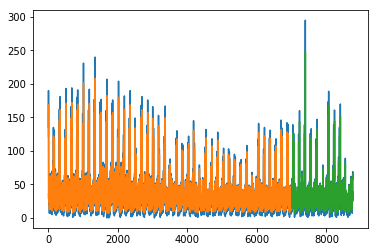

In [18]:

#Training/Testing Data (Train on Jan-Oct, Ttest on Nov-Dec) 370472 is index
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
test2_size = len(dataset2)
train = dataset[0:train_size,:]
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
test2 = dataset2

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
test2X, test2Y = create_dataset(test2, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
test2X = numpy.reshape(test2X, (test2X.shape[0], 1, test2X.shape[1]))



# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(1, input_shape=(1, look_back)))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=10, verbose=2)




# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
test2Predict = model.predict(test2X)
 #invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
test2Predict = scaler.inverse_transform(test2Predict)
test2Y = scaler.inverse_transform([test2Y])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
test2Score = math.sqrt(mean_squared_error(test2Y[0], test2Predict[:,0]))
print('Test2 Score: %.2f RMSE' % (test2Score))

       #
print('training actual:', trainY[0])
print('training predict:', trainPredict[:,0]  )
print(numpy.mean(abs(trainY[0]   -trainPredict[:,0]  )))

print('testing actual:', testY[0] )
print('testing predict:', testPredict[:,0] )
print(numpy.mean( abs(testY[0] - testPredict[:,0]  )))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)


#Test2 Predictions



RMSE_list[i] = test2Score
Test_MAPE = 100 * (1/len(test2Predict) ) * sum(abs(test2Y[0]- test2Predict[:,0] )/ abs(test2Y[0]))
MAPE_list[i] = Test_MAPE
print('Test_MAPE:', Test_MAPE)

[[[0.4557823 ]]

 [[0.48639455]]

 [[0.64285713]]

 ...

 [[0.14285715]]

 [[0.10204081]]

 [[0.1292517 ]]]


In [19]:
test2X, test2Y = create_dataset(train, look_back)
test2X = numpy.reshape(test2X, (test2X.shape[0], 1, test2X.shape[1]))
test2Predict = model.predict(test2X)
test2Predict = scaler.inverse_transform(test2Predict)
test2Y = scaler.inverse_transform([test2Y])

print('train:', len(trainY[0]))
print('TestY:', len(testY[0]))
print('test2Y:', len(test2Y[0]))

print('training actual:', test2Y[0])
print('training predict:', test2Predict[:,0]  )

print(numpy.mean(abs(test2Y[0]   -test2Predict[:,0]  )))

train: 7006
TestY: 1750
test2Y: 7006
training actual: [143.9999967  189.99999272 188.00000742 ...  31.00000076  38.99999911
  41.99999904]
training predict: [122.16183  129.92851  168.68355  ...  42.282852  32.196266  38.90262 ]
9.395782478939301


In [17]:
import numpy
numpy.savetxt("LSTM_MAPE.csv", MAPE_list, delimiter=",")
numpy.savetxt("LSTM_RMSE.csv", RMSE_list, delimiter=",")

In [ ]:
#LSTM on Residuals

In [75]:
#for i in range(len(PUL_list)):
Total_dataframe = pandas.read_csv('Demand_Data3_2017_Total.csv', usecols=[4,3,15])
for i in range(1):
        print(i/len(PUL_list))
        PULoc = PUL_list[i]
        dataframe = Total_dataframe
        dataframe['Residuals'] = dataframe['passenger_count'] - dataframe['OLS_fitted_value']
        dataframe = dataframe[dataframe['PULocationID'] == PULoc]
        dataframe = dataframe['Residuals']
        dataset = dataframe.values
        dataset = dataset.astype('float32')
        dataset = numpy.reshape(dataset, (len(dataset),1))
        
        #Preprocessing Training
        scaler = MinMaxScaler(feature_range=(0, 1))
        dataset = scaler.fit_transform(dataset)
        
        #Training/Testing Data (Train on Jan-Oct, Ttest on Nov-Dec) 370472 is index
        train_size = int(len(dataset) * 0.8333)
        test_size = len(dataset) - train_size
        train = dataset[0:train_size,:]
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        
        def create_dataset(dataset, look_back=1):
            dataX, dataY = [], []
            for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]
                dataX.append(a)
                dataY.append(dataset[i + look_back, 0])
            return numpy.array(dataX), numpy.array(dataY)

        # reshape into X=t and Y=t+1
        look_back = 1
        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)

        # reshape input to be [samples, time steps, features]
        trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        
        
        # create and fit the LSTM network
        model = Sequential()
        #model.add(LSTM(1, input_shape=(1, look_back)))
        model.add(LSTM(4))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(trainX, trainY, epochs=10, batch_size=10, verbose=2)



        # make predictions
        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)
         #invert predictions
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        
        #Add Residuals Back in:
        dataframe = Total_dataframe
        dataframe = dataframe[dataframe['PULocationID'] == PULoc]
        dataframe = dataframe['OLS_fitted_value']
        dataset = dataframe.values
        
        
        # calculate root mean squared error
        trainScore = math.sqrt(mean_squared_error(trainY[0] + dataset[0:len(trainY[0])], trainPredict[:,0]  + dataset[0:len(trainY[0])]))
        print('Train Score: %.2f RMSE' % (trainScore))
        testScore = math.sqrt(mean_squared_error(testY[0]  + dataset[len(trainY[0])+1: len(trainY[0])+1 + len(testY[0])],
                                                 testPredict[:,0] +  dataset[len(trainY[0])+1: len(trainY[0])+1 + len(testY[0])]))
        print('Test Score: %.2f RMSE' % (testScore))

        print('training actual:', trainY[0] + dataset[0:len(trainY[0])])
        print('training predict:', trainPredict[:,0]  + dataset[0:len(trainY[0])])
        print(numpy.mean(abs(trainY[0]   -trainPredict[:,0]  )))
        
        print('testing actual:', testY[0] )
        print('testing predict:', testPredict[:,0]  )
        print(numpy.mean( abs(testY[0] - testPredict[:,0]  )))

        #relaod dataset for plotting
        
        # shift train predictions for plotting
        #trainPredictPlot = numpy.empty_like(dataset)
        #trainPredictPlot[:, :] = numpy.nan
        #trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
        # shift test predictions for plotting
        #testPredictPlot = numpy.empty_like(dataset)
        #testPredictPlot[:, :] = numpy.nan
        #testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
        # plot baseline and predictions
        #plt.plot(scaler.inverse_transform(dataset))
        #plt.plot(trainPredictPlot)
        #plt.plot(testPredictPlot)
        
        RMSE_list[i] = testScore
        Test_MAPE = 100 * (1/len(testPredict) ) * sum(abs((testY[0] +  dataset[0:len(testY[0])] )- (testPredict[:,0] + dataset[0:len(testY[0])]) )/ abs(testY[0]))
        MAPE_list[i] = Test_MAPE
        print('Test_MAPE:', Test_MAPE)
        
        




0.0
Epoch 1/10
 - 11s - loss: 0.0717
Epoch 2/10
 - 2s - loss: 0.0142
Epoch 3/10
 - 2s - loss: 0.0083
Epoch 4/10
 - 2s - loss: 0.0083
Epoch 5/10
 - 2s - loss: 0.0083
Epoch 6/10
 - 2s - loss: 0.0083
Epoch 7/10
 - 2s - loss: 0.0082
Epoch 8/10
 - 2s - loss: 0.0083
Epoch 9/10
 - 2s - loss: 0.0083
Epoch 10/10
 - 2s - loss: 0.0083
Train Score: 37.46 RMSE
Test Score: 39.61 RMSE
training actual: [164.7543879  229.36449392 239.93946409 ... 154.79734958  82.94018922
  47.52407601]
training predict: [130.17864084 137.60215838 177.15941242 ...  53.46023527  57.7238158
  14.36893273]
29.271704860238827
testing actual: [  44.12457527  -48.39992197 -154.99574615 ...  -92.75599201  -68.7086306
  -42.34629694]
testing predict: [  49.902153   29.737656  -55.18643  ... -131.49863   -97.174416
  -74.3849  ]
30.57554894489433
Test_MAPE: 457.7740945027177


In [ ]:
import numpy
numpy.savetxt("LSTM_LM_MAPE.csv", MAPE_list, delimiter=",")
numpy.savetxt("LSTM_LM_RMSE.csv", RMSE_list, delimiter=",")

In [211]:
dataframe = pandas.read_csv('Demand_Data3_2017_Total.csv', usecols=[4,3,15])
dataframe['Residuals'] = dataframe['passenger_count'] - dataframe['OLS_fitted_value']
print(dataframe)

        PULocationID  passenger_count  OLS_fitted_value   Residuals
0                  4              135        220.071280  -85.071280
1                 12                3        224.028070 -221.028070
2                 13              104        224.522669 -120.522669
3                 24               94        229.963255 -135.963255
4                 43              401        239.360631  161.639369
5                 45               54        240.349829 -186.349829
6                 48              697        241.833625  455.166375
7                 50              315        242.822822   72.177178
8                 68              664        251.725600  412.274400
9                 79             1076        257.166186  818.833814
10                87              150        261.122976 -111.122976
11                88               70        261.617574 -191.617574
12                90              470        262.606772  207.393228
13               100              100        267

In [212]:
dataframe = dataframe[dataframe['PULocationID'] == PULoc]
dataframe = dataframe['Residuals']
dataset = dataframe.values
dataset = dataset.astype('float32')
#dataset = dataset[0:24*100]
dataset = numpy.reshape(dataset, (len(dataset),1))

In [213]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset2 = dataset

In [214]:
#Training/Testing Data (Train on Jan-Oct, Ttest on Nov-Dec) 370472 is index
print(len(dataset))
train_size = int(len(dataset) * 0.8333)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
print(len(train))
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
#train_size = len(dataset)
#test_size = len(Test_Values)
#train = dataset
#test = Test_Values

8759
7298


In [215]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



7298
[[0.609821  ]
 [0.68862927]
 [0.95467937]
 ...
 [0.41143018]
 [0.49045014]
 [0.50288725]]
[0.68862927 0.95467937 0.9651578  ... 0.49045014 0.50288725 0.45222116]


In [216]:

# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(1, input_shape=(1, look_back)))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=10, verbose=2)




Epoch 1/10
 - 3s - loss: 0.0293
Epoch 2/10
 - 1s - loss: 0.0104
Epoch 3/10
 - 1s - loss: 0.0081
Epoch 4/10
 - 1s - loss: 0.0075
Epoch 5/10
 - 1s - loss: 0.0074
Epoch 6/10
 - 1s - loss: 0.0074
Epoch 7/10
 - 1s - loss: 0.0074
Epoch 8/10
 - 1s - loss: 0.0074
Epoch 9/10
 - 1s - loss: 0.0074
Epoch 10/10
 - 1s - loss: 0.0074


In [217]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 #invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))




Train Score: 81.37 RMSE
Test Score: 83.27 RMSE


[[[0.609821  ]]

 [[0.68862927]]

 [[0.95467937]]

 ...

 [[0.41143018]]

 [[0.49045014]]

 [[0.50288725]]]


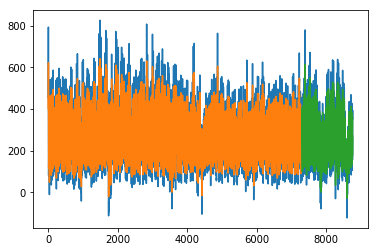

In [219]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

In [220]:
#Undo the Residuals

In [221]:
print(len(trainPredict))
print(len(testPredict))

7296
1459


In [222]:
dataframe = pandas.read_csv('Demand_Data3_2017_Total.csv', usecols=[4,3,15])
dataframe['Residuals'] = dataframe['passenger_count'] - dataframe['OLS_fitted_value']
dataframe = dataframe[dataframe['PULocationID'] == PULoc]
dataframe = dataframe['Residuals']
print(dataframe.values)

[455.1663753  529.9207638  782.2852665  ... 393.5290163  392.891366
 352.93202097]


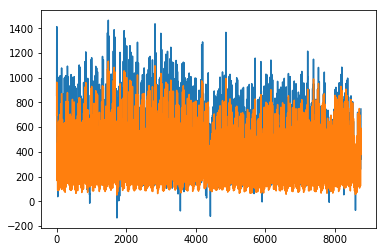

In [227]:

Predicted_Residuals = numpy.append(trainPredict,testPredict)
original = dataframe.values

Predicted = Predicted_Residuals  + original[:-4]
plt.plot(Predicted)

dataframe = pandas.read_csv('Demand_Data3_2017_Total.csv', usecols=[4,3,15])
dataframe = dataframe[dataframe['PULocationID'] == PULoc]
dataframe = dataframe['passenger_count']
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset = numpy.reshape(dataset, (len(dataset),1))
plt.plot(dataset)

[405.6424  463.18777 650.94135 ... 188.65822 268.19272 268.34552]
